# **Apresentação do Desafio**

##**Contexto e Desafios**


A **QuantumFinance** tem um canal de atendimento via chat e precisar classificar os assuntos dos atendimentos para melhorar as tratativas dos chamados dos clientes. O canal recebe textos abertos dos clientes relatando o problema e/ou dúvida e depois é direcionado para algum uma área especialista no assunto para uma melhor tratativa.
O desafio de sua equipe é
Parte 1 - Criar um modelo classificador de assuntos aplicando técnicas tradicionais de NLP, que consiga classificar através de um texto o assunto conforme disponível na base de dados [1] para treinamento e validação do modelo seu modelo.

Parte 2 – Realizar a tarefa de classificação apresentada no ítem anterior com a utilização IA Generativa, utilizando as técnicas de prompt engineering discutidas em sala

Parte 3 (Extra) – Utilizar a IA Generativa para fazer uma classificação livre de assuntos e avaliar qualitativamente os resultados.
Observação: Nas partes 2 e 3 do trabalho utilizar a base de dados estratificada disponibilizada em [2]. Esta amostra possui 200 registros de cada categoria. Este ajuste deve-se à limitação do número de tokens disponibilizados no modo gratuito da API da openAI. Para fazer o desenvolvimento de prompt, busque rodar com poucos exemplos e ir incrementando aos poucos, a medida em que vá melhorando.

​[1] - https://raw.githubusercontent.com/thiagonogueira/datasets/main/tickets_reclamacoes_classificados_one_line.csv
[2] - https://raw.githubusercontent.com/thiagonogueira/datasets/main/tickets_reclamacoes_classificados_one_line_generative.csv


##**Entregáveis**

**Jupyter Notebook:**

O notebook deverá estar bem organizado com seções claras e textos que facilitem a compreensão da análise e decisões tomadas e que permita a obtenção do resultado final a partir do dataset disponibilizado. Utilize o notebook de template para a entrega.
O modelo precisar atingir um score na métrica F1 Score superior a 75%. Utilize o dataset [1] para treinar e testar o modelo, separe o dataset em duas amostras (75% para treinamento e 25% para teste com o randon_state igual a 42).​
Fique à vontade para testar e explorar as técnicas de pré-processamento, abordagens de NLP, algoritmos e bibliotecas, mas explique e justifique as suas decisões durante o desenvolvimento.​

**Importante:**  parte significativa da avaliação do resultado será feita com a execução do notebook. Desta forma, é importante que todas as células executem corretamente e que os resultados sejam integralmente reprodutíveis;

##**Notas e Grupos**

**Notas:**

Parte 1 (70%), sendo:

35% - Demonstrações das aplicações das técnicas de PLN (regras, pré-processamentos, tratamentos, variedade de modelos aplicados, organização do pipeline, etc.)

35% - Baseado na performance (score) obtida com a amostra de teste no pipeline do modelo campeão (validar com a Métrica F1 Score). Separar o pipeline completo do modelo campeão conforme template.​

Parte 2 (30%)

Parte 3 (Extra): Poderá acrescentar em até 2 pontos a nota do trabalho final.

**Grupos:**

O trabalho deverá ser feito, **necessariamente**, em grupo de 3 até 4 pessoas

# **Entrega**

## **Parte 1**

In [ ]:
# todos os import usados na parte 1 e 2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# CARREGANDO O DATA FRAME
df = pd.read_csv('https://raw.githubusercontent.com/thiagonogueira/datasets/main/tickets_reclamacoes_classificados_one_line.csv', delimiter=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_reclamacao         21072 non-null  int64 
 1   data_abertura         21072 non-null  object
 2   categoria             21072 non-null  object
 3   descricao_reclamacao  21072 non-null  object
dtypes: int64(1), object(3)
memory usage: 658.6+ KB


In [ ]:
# Visualiza as primeiras linhas do dataframe
print("Amostra dos dados:")
print(df.head())

Amostra dos dados:
   id_reclamacao              data_abertura  \
0        3229299  2019-05-01T12:00:00-05:00   
1        3199379  2019-04-02T12:00:00-05:00   
2        3233499  2019-05-06T12:00:00-05:00   
3        3180294  2019-03-14T12:00:00-05:00   
4        3224980  2019-04-27T12:00:00-05:00   

                             categoria  \
0              Hipotecas / Empréstimos   
1  Cartão de crédito / Cartão pré-pago   
2  Cartão de crédito / Cartão pré-pago   
3  Cartão de crédito / Cartão pré-pago   
4           Serviços de conta bancária   

                                descricao_reclamacao  
0  Bom dia, meu nome é xxxx xxxx e agradeço se vo...  
1  Atualizei meu cartão xxxx xxxx em xx/xx/2018 e...  
2  O cartão Chase foi relatado em xx/xx/2019. No ...  
3  Em xx/xx/2018, enquanto tentava reservar um ti...  
4  Meu neto me dê cheque por {$ 1600,00} Eu depos...  


In [ ]:
# Verifica a distribuição das classes
print("\nDistribuição das classes:")
print(df['categoria'].value_counts())


Distribuição das classes:
Serviços de conta bancária             5161
Cartão de crédito / Cartão pré-pago    5006
Roubo / Relatório de disputa           4822
Hipotecas / Empréstimos                3850
Outros                                 2233
Name: categoria, dtype: int64


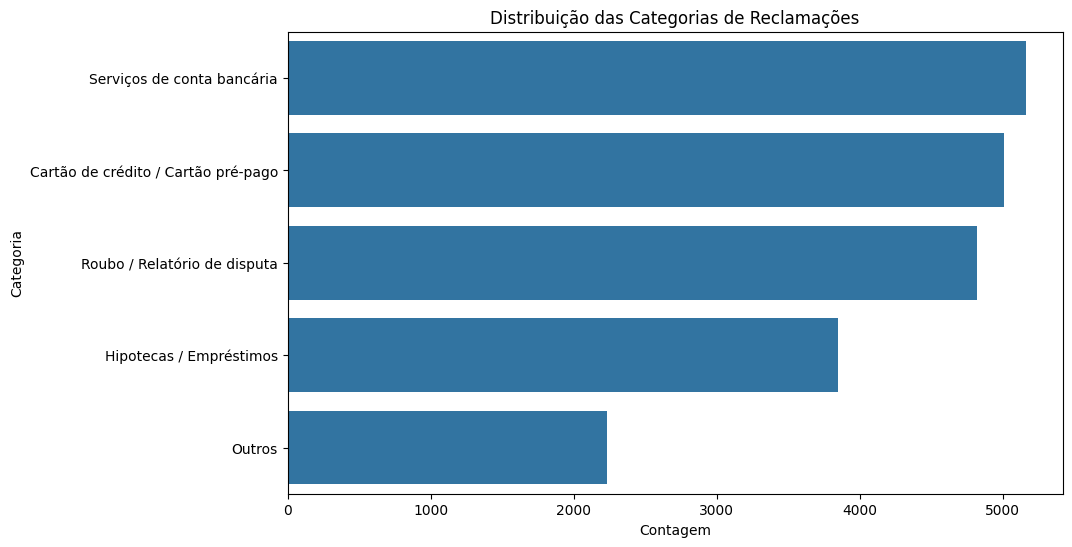

In [ ]:
# Visualização da distribuição das categorias
plt.figure(figsize=(10, 6))
sns.countplot(y='categoria', data=df, order = df['categoria'].value_counts().index)
plt.title('Distribuição das Categorias de Reclamações')
plt.xlabel('Contagem')
plt.ylabel('Categoria')
plt.show()

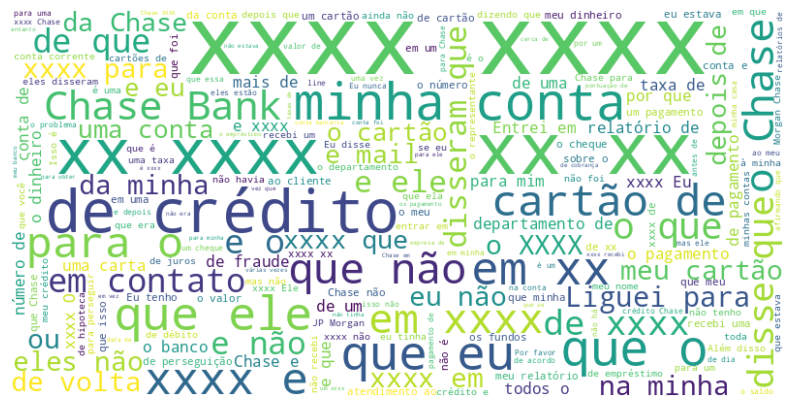

In [ ]:
# Função para gerar uma nuvem de palavras
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Nuvem de palavras para todas as reclamações
generate_wordcloud(' '.join(df['descricao_reclamacao']))

In [ ]:
# Retirada de stop words e XXXX e XX
stopwords_pt = set(stopwords.words('portuguese'))
anonimização = ["xxxx", "xx"]
def limpa_reclamacao(desc):
    tokens = word_tokenize(desc)
    cleaned_tokens = [word for word in tokens if word.lower() not in stopwords_pt and not any(anon in word.lower() for anon in anonimização)]
    return ' '.join(cleaned_tokens)


df['descricao_reclamacao_cleaned'] = df['descricao_reclamacao'].apply(limpa_reclamacao)




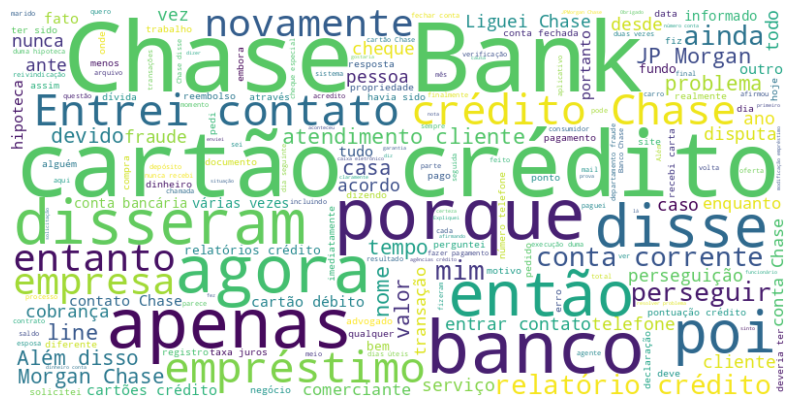

In [ ]:
generate_wordcloud(' '.join(df['descricao_reclamacao_cleaned']))

In [ ]:
# Divisão dos dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df['descricao_reclamacao_cleaned'], df['categoria'], test_size=0.25, random_state=42)

# Criação do vetorizador TF-IDF com stop_words em português
stop_words = stopwords.words('portuguese')
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)

In [ ]:
# Realizando a vetorização dos dados de treinamento e teste
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Treinando diferentes modelos para ver qual apresenta melhor acurácia
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')

Naive Bayes: Accuracy = 0.74
SVM: Accuracy = 0.90
Random Forest: Accuracy = 0.84


In [ ]:
# Avaliação do modelo Naive Bayes
print("Classificação Naive Bayes:")
print(classification_report(y_test, models['Naive Bayes'].predict(X_test_tfidf)))

Classificação Naive Bayes:
                                     precision    recall  f1-score   support

Cartão de crédito / Cartão pré-pago       0.74      0.76      0.75      1290
            Hipotecas / Empréstimos       0.85      0.80      0.82       922
                             Outros       1.00      0.06      0.12       549
       Roubo / Relatório de disputa       0.73      0.80      0.76      1204
         Serviços de conta bancária       0.69      0.90      0.78      1303

                           accuracy                           0.74      5268
                          macro avg       0.80      0.67      0.65      5268
                       weighted avg       0.77      0.74      0.71      5268



In [ ]:
# Avaliação do modelo SVM
print("Classificação SVM:")
print(classification_report(y_test, models['SVM'].predict(X_test_tfidf)))

Classificação SVM:
                                     precision    recall  f1-score   support

Cartão de crédito / Cartão pré-pago       0.91      0.91      0.91      1290
            Hipotecas / Empréstimos       0.91      0.93      0.92       922
                             Outros       0.91      0.85      0.88       549
       Roubo / Relatório de disputa       0.88      0.88      0.88      1204
         Serviços de conta bancária       0.90      0.92      0.91      1303

                           accuracy                           0.90      5268
                          macro avg       0.90      0.90      0.90      5268
                       weighted avg       0.90      0.90      0.90      5268



In [ ]:
# Avaliação do modelo Random Forest
print("Classificação Random Forest:")
print(classification_report(y_test, models['Random Forest'].predict(X_test_tfidf)))

Classificação Random Forest:
                                     precision    recall  f1-score   support

Cartão de crédito / Cartão pré-pago       0.83      0.88      0.85      1290
            Hipotecas / Empréstimos       0.87      0.89      0.88       922
                             Outros       0.90      0.46      0.61       549
       Roubo / Relatório de disputa       0.84      0.82      0.83      1204
         Serviços de conta bancária       0.80      0.92      0.86      1303

                           accuracy                           0.84      5268
                          macro avg       0.85      0.80      0.81      5268
                       weighted avg       0.84      0.84      0.83      5268



Após a avalição do f1-score de todos os modelos, optamos pelo modelo SVM apesar dele demorar mais para executar e apresentar os resultados, foi o que apresentou maior acurácia usando a métrica f1-score.

Segue abaixo o prompt separado do treinamento, a verificação da acurácia e a verificação do f1-score do modelo escolhido.

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

models = {
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')

print("Classificação SVM:")
print(classification_report(y_test, models['SVM'].predict(X_test_tfidf)))

SVM: Accuracy = 0.90
Classificação SVM:
                                     precision    recall  f1-score   support

Cartão de crédito / Cartão pré-pago       0.91      0.91      0.91      1290
            Hipotecas / Empréstimos       0.91      0.93      0.92       922
                             Outros       0.91      0.85      0.88       549
       Roubo / Relatório de disputa       0.88      0.88      0.88      1204
         Serviços de conta bancária       0.90      0.92      0.91      1303

                           accuracy                           0.90      5268
                          macro avg       0.90      0.90      0.90      5268
                       weighted avg       0.90      0.90      0.90      5268



## **Parte 2**

In [ ]:
# CARREGANDO O DATA FRAME
df_gen = pd.read_csv('https://raw.githubusercontent.com/thiagonogueira/datasets/main/tickets_reclamacoes_classificados_one_line_generative.csv', delimiter=';')

In [ ]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_reclamacao         1000 non-null   int64 
 1   data_abertura         1000 non-null   object
 2   categoria             1000 non-null   object
 3   descricao_reclamacao  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
# Verifica a distribuição das classes
print("\nDistribuição das classes:")
print(df_gen['categoria'].value_counts())


Distribuição das classes:
Cartão de crédito / Cartão pré-pago    200
Hipotecas / Empréstimos                200
Outros                                 200
Roubo / Relatório de disputa           200
Serviços de conta bancária             200
Name: categoria, dtype: int64


In [ ]:
#pip install openai
#pip install openai==0.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openai: filename=openai-0.10.0-py3-none-any.whl size=167531 sha256=3143ec79a28f38185d997c5d8008503cae1091cdcbefef899b622a1a4d2077db
  Stored in directory: /root/.cache/pip/wheels/f8/03/d9/0066db11fca0127f95cd38b32c4cb378f4f8f966648238a644
Successfully built openai
  Attempting uninstall: openai
    Found existing installation: openai 1.12.0
    Uninstalling openai-1.12.0:
      Successfully uninstalled openai-1.12.0


In [ ]:
# Teste para ver se a solicitação a api foi bem sucedida
import requests
import openai

# Passando a chave api
api_key = 'chave api'

# Definindo o cabeçalho de autenticação
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Bearer {api_key}'
}

# Definindo os dados da solicitação
data = {
    "model": "gpt-3.5-turbo",
    "messages": [{"role": "user", "content": "Testando"}],
    "temperature": 0.7
}

# Faz a solicitação a API
response = requests.post('https://api.openai.com/v1/chat/completions', json=data, headers=headers)

# Verifica se a solicitação foi bem-sucedida
if response.status_code == 200:
    result = response.json()
    print("Solicitação bem-sucedida!")
else:
    print(f"Erro ao fazer a solicitação: {response.text}")


Solicitação bem-sucedida!


In [ ]:
# Definindo a chave da API
api_key = 'chave api'

# Categorias disponíveis no dataset
categorias_disponiveis = df['categoria'].unique()

# Função de classificação usando IA Generativa e prompt engineering
def classify_with_generative_ai(prompt):
    prompt_with_engineering = f"Classificar o seguinte texto: \"{prompt}\". Categorias disponíveis: {categorias_disponiveis.tolist()}.\nCategoria:"
    data = {
        "model": "gpt-3.5-turbo",
        "messages": [{"role": "user", "content": prompt_with_engineering}],
        "temperature": 0.7,
        "max_tokens": 100
    }

    # Fazendo a solicitação para a API
    response = requests.post('https://api.openai.com/v1/chat/completions', json=data, headers={"Authorization": f'Bearer {api_key}'})

    # Verifica se a solicitação foi bem-sucedida
    if response.status_code == 200:
        result = response.json()
        # Recebe a classificação prevista
        classification = result['choices'][0]['message']['content']

        return classification
    else:
        return f"Erro ao fazer a solicitação: {response.text}"

# Exemplo
prompt = "Quero um limite no cartão maior"
classification = classify_with_generative_ai(prompt)
print("Classificação:", classification)


Classificação: Cartão de crédito / Cartão pré-pago


## **Parte 3**

In [ ]:
#pip install transformers scikit-learn pandas
#pip install transformers
#pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Carrega a base de dados
url = "https://raw.githubusercontent.com/thiagonogueira/datasets/main/tickets_reclamacoes_classificados_one_line_generative.csv"
data = pd.read_csv(url, delimiter=';', on_bad_lines='skip')

In [ ]:
#Verificação dos dados da base
print("Primeiras linhas dos dados:")
print(data.head())

Primeiras linhas dos dados:
   id_reclamacao              data_abertura  \
0        3409650  2019-10-18T12:00:00-05:00   
1        2824212  2018-02-23T12:00:00-05:00   
2        3322111  2019-07-29T12:00:00-05:00   
3        3435102  2019-11-11T12:00:00-05:00   
4        3556741  2020-03-06T12:00:00-05:00   

                             categoria  \
0  Cartão de crédito / Cartão pré-pago   
1  Cartão de crédito / Cartão pré-pago   
2  Cartão de crédito / Cartão pré-pago   
3  Cartão de crédito / Cartão pré-pago   
4  Cartão de crédito / Cartão pré-pago   

                                descricao_reclamacao  
0  Chase afirma que eles me enviaram uma carta em...  
1  Em xx/xx/xxxx, tentei usar meu chase xxxx, ele...  
2  JPMCB - Inquérito de serviço do cartão do cart...  
3  O Chase Bank me relatou as agências de crédito...  
4  Começando o XX/XX/2016, fui vítima de empresas...  


In [ ]:
# Pré-processamento dos dados
le = LabelEncoder()
data['categoria_encoded'] = le.fit_transform(data['categoria'])
data['descricao_reclamacao_cleaned'] = data['descricao_reclamacao'].apply(limpa_reclamacao)
# Separa os dados em treino e teste
X = data['descricao_reclamacao_cleaned']
y = data['categoria_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Tokenização dos dados
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
X_train_tokenized = tokenizer(list(X_train), padding=True, truncation=True, max_length=128, return_tensors='tf')
X_test_tokenized = tokenizer(list(X_test), padding=True, truncation=True, max_length=128, return_tensors='tf')

In [ ]:
# Converte para tensores
X_train_ids = tf.constant(X_train_tokenized['input_ids'])
X_train_mask = tf.constant(X_train_tokenized['attention_mask'])
X_test_ids = tf.constant(X_test_tokenized['input_ids'])
X_test_mask = tf.constant(X_test_tokenized['attention_mask'])

In [ ]:
# Modelo BERT para classificação de texto
model = TFBertForSequenceClassification.from_pretrained('bert-large-uncased', num_labels=len(le.classes_))

# Compilação do modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Treinamento do modelo
history = model.fit(
    [X_train_ids, X_train_mask],
    y_train,
    validation_data=([X_test_ids, X_test_mask], y_test),
    epochs=3,
    batch_size=8,
    verbose=1
)

Epoch 1/3
100/100 [==============================] - 78s 784ms/step - loss: 1.6278 - accuracy: 0.2013 - val_loss: 1.6129 - val_accuracy: 0.2000
Epoch 2/3
100/100 [==============================] - 83s 826ms/step - loss: 1.6344 - accuracy: 0.1800 - val_loss: 1.6102 - val_accuracy: 0.2000
Epoch 3/3
100/100 [==============================] - 83s 828ms/step - loss: 1.6307 - accuracy: 0.1912 - val_loss: 1.6134 - val_accuracy: 0.2000


In [ ]:
# Avaliação do modelo
results = model.evaluate([X_test_ids, X_test_mask], y_test, batch_size=16)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

13/13 [==============================] - 11s 431ms/step - loss: 1.6134 - accuracy: 0.2000
Test Loss: 1.613448977470398
Test Accuracy: 0.20000000298023224


In [ ]:
# Previsões
y_pred = model.predict([X_test_ids, X_test_mask]).logits.argmax(axis=-1)

7/7 [==============================] - 12s 764ms/step


In [ ]:
# Relatório de classificação
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_))

                                     precision    recall  f1-score   support

Cartão de crédito / Cartão pré-pago       0.00      0.00      0.00        40
            Hipotecas / Empréstimos       0.00      0.00      0.00        40
                             Outros       0.00      0.00      0.00        40
       Roubo / Relatório de disputa       0.20      1.00      0.33        40
         Serviços de conta bancária       0.00      0.00      0.00        40

                           accuracy                           0.20       200
                          macro avg       0.04      0.20      0.07       200
                       weighted avg       0.04      0.20      0.07       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
